In [52]:
#Muhammad Faridho Muslimin - 13317010
#Muhammad Reza Firdaus - 13317020
#Muhammad Farrel Mahendra - 13317027
#Sa'ad Fadlulloh - 13317028

In [6]:
#Import library yang digunakan
#Untuk library mlxtend mungkin belum terinstall, untuk menginstallnya bisa lewat jupyter dengan mengetik pip install mlxtend
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
import sklearn.linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mlxtend.plotting import plot_decision_regions
import sklearn.neural_network
import sklearn.ensemble
from sklearn.decomposition import PCA
import sklearn.naive_bayes
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [7]:
#Load dataset
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'],
    columns = ds['feature_names'])
    code_species_map = dict(zip(
    range(3), ds['target_names']))
    df['species'] = [code_species_map[c]
    for c in ds['target']]
    return df
df = get_iris_df()

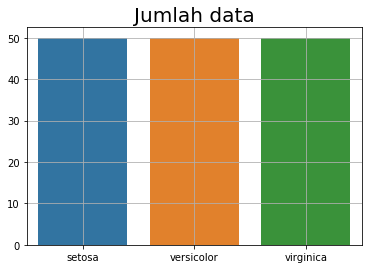

Dapat dilihat bahwa jumlah data untuk setiap species sama yaitu masing - masing sebanyak 50 data


In [8]:
#Membuat plot berisi jumlah data
a, b = np.unique(df['species'],return_counts = True)
plt.title('Jumlah data', size = 20)
sns.barplot(a,b)
plt.grid()
plt.show()
print('Dapat dilihat bahwa jumlah data untuk setiap species sama yaitu masing - masing sebanyak 50 data')

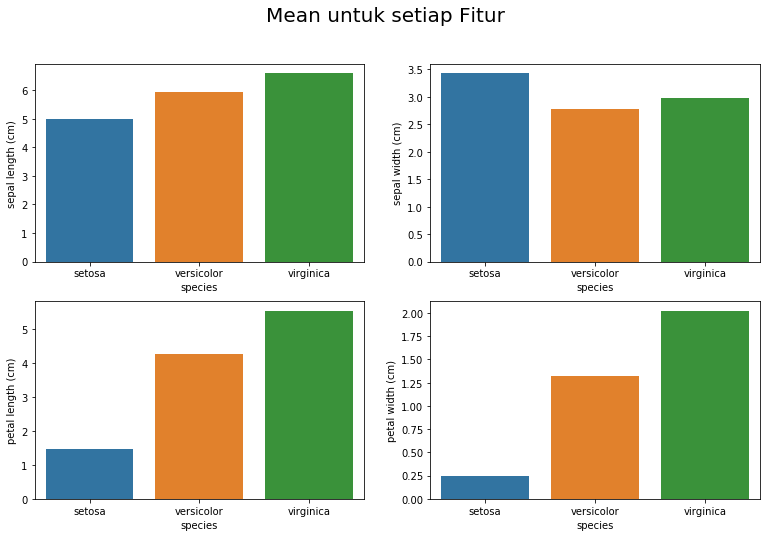

Dapat dilihat bahwa fitur sepal length dan sepal width memiliki mean yang cukup seragam, sementara fitur petal length dan petal width memiliki mean yang bervariasi


In [10]:
#Membuat plot berisi rata - rata setiap fitur per species
plt.subplots(2,2,figsize = (13,8))

plt.suptitle('Mean untuk setiap Fitur', size = 20)
for i in range (4):
    plt.subplot(2,2,i+1)
    temp = df.groupby('species').mean().iloc[:,i]
    sns.barplot(x = temp.index, y = temp.values)
    plt.xticks(rotation = 0)
    plt.ylabel( df.groupby('species').mean().columns[i])
plt.show()
print('Dapat dilihat bahwa fitur sepal length dan sepal width memiliki mean yang cukup seragam, sementara fitur petal length dan petal width memiliki mean yang bervariasi')

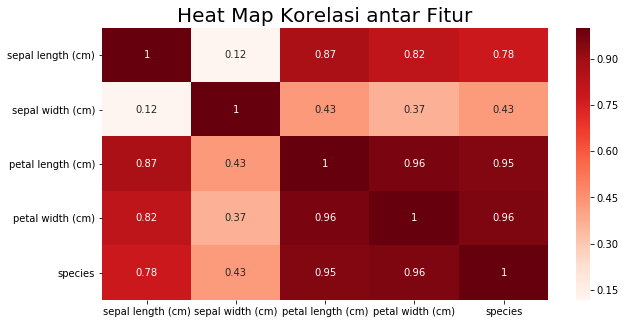

Dapat dilihat bahwa fitur Petal Length dan Petal Width memiliki korelasi yang tinggi dengan fitur species


In [11]:
temp = df.copy()
temp.species = LabelEncoder().fit_transform(df['species'])
plt.figure(figsize = (10,5))
sns.heatmap(abs(temp.corr()), annot=True, cmap=plt.cm.Reds)
plt.xticks(rotation = 0)
plt.title('Heat Map Korelasi antar Fitur', size = 20 )
plt.show()
print('Dapat dilihat bahwa fitur Petal Length dan Petal Width memiliki korelasi yang tinggi dengan fitur species')

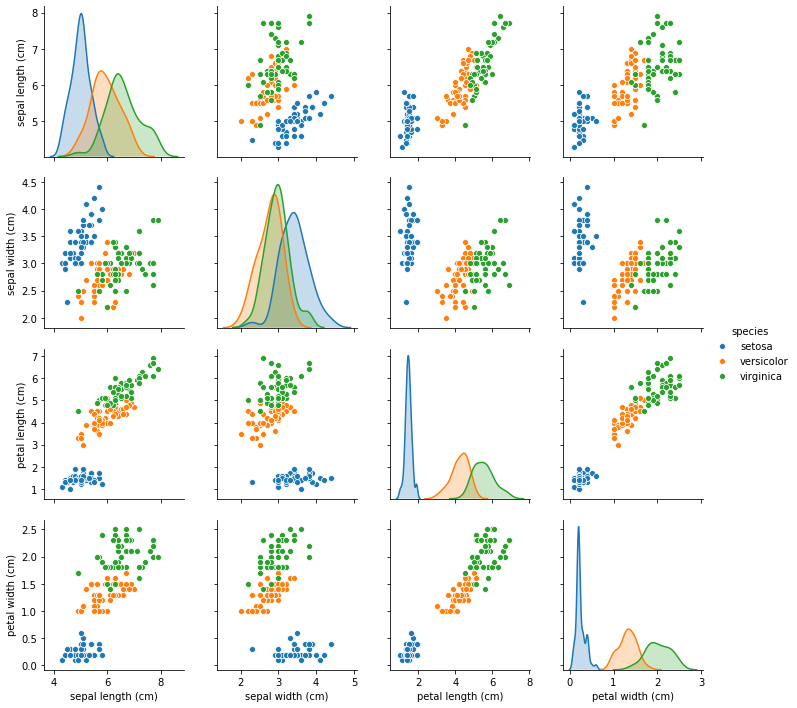

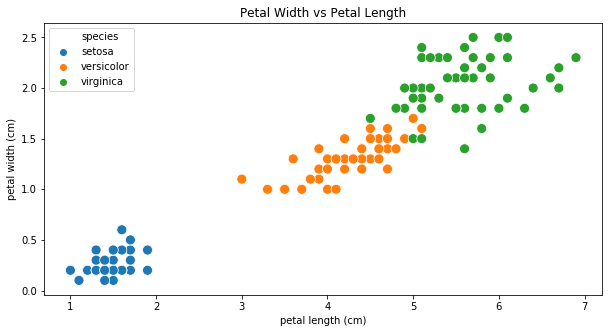

Dari pairplot dapat dilihat bahwa fitur petal length(cm) dan petal width(cm) cukup bisa membedakan antar species, dan plotnya cukup linearly separable maka akan dipilih fitur - fitur tersebut untuk melatih model


In [12]:
#Membuat pairplot setiap fitur
sns.pairplot(df, hue = 'species')
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'petal length (cm)', y= 'petal width (cm)', hue = 'species', data = df, s = 100)
plt.title('Petal Width vs Petal Length')
plt.show()
print('Dari pairplot dapat dilihat bahwa fitur petal length(cm) dan petal width(cm) cukup bisa membedakan antar species, dan plotnya cukup linearly separable maka akan dipilih fitur - fitur tersebut untuk melatih model')

In [13]:
#Data preprocessing
scaler = StandardScaler()
le = LabelEncoder()

#Memilih fitur petal length dan petal width untuk di training
X = np.array(df.iloc[:,[2,3]])
y_label = np.array(df.species)

#Meng-encode data kategorikal
y = le.fit_transform(y_label)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify = y)

#Scaling data dengan normalisasi, normalisasi diperlukan agar proses optimisasi berlangsung cepat
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [14]:
print('Mapping pada Label Encoding')
for i in range (3):
    print (le.inverse_transform([i]), ' menjadi :', i)

Mapping pada Label Encoding
['setosa']  menjadi : 0
['versicolor']  menjadi : 1
['virginica']  menjadi : 2


In [15]:
#Pengujian Model
#Disini dipilih 8 model termasuk Logistic Regression untuk membandingkan performanya
#Logistic Regression
logr= sklearn.linear_model.LogisticRegression(n_jobs = -1, 
                                               random_state = 12, penalty = 'l2', C = 5000)
#Support Vector Machine
svc = sklearn.svm.SVC(C = 1e4, kernel = 'rbf', gamma = 84,probability=True )

#Neural Network
nn = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20,20,20,20),alpha = 1, max_iter = 200, 
                                          random_state =200, batch_size = 15)
#Random Forest
rf = sklearn.ensemble.RandomForestClassifier(max_depth = 10, random_state = 3)

#K-Nearest Neighbors
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)

#Decision Trees
dt = sklearn.tree.DecisionTreeClassifier()

#Naive Bayes
nb = sklearn.naive_bayes.GaussianNB()

#Ensembling Classifier
ens = sklearn.ensemble.VotingClassifier(estimators=[('lr', logr), ('svm', svc), ('nn', nn), ('rf', rf), 
                                                    ('knn', knn), ('dt', dt), ('nb', nb)], voting = 'soft', n_jobs = -1)


clf_list = [logr,svc,nn,rf,knn,dt,nb,ens]
for clf in clf_list :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__)
    print(' Training Score : '.ljust(20), round(clf.score(X_train,y_train),3))
    print(' Test Score : '.ljust(20), round(clf.score(X_test, y_test),3), '\n')


LogisticRegression
 Training Score :    0.955
 Test Score :        0.974 

SVC
 Training Score :    0.991
 Test Score :        1.0 

MLPClassifier
 Training Score :    0.946
 Test Score :        0.974 

RandomForestClassifier
 Training Score :    0.991
 Test Score :        0.974 

KNeighborsClassifier
 Training Score :    0.982
 Test Score :        1.0 

DecisionTreeClassifier
 Training Score :    0.991
 Test Score :        0.974 

GaussianNB
 Training Score :    0.946
 Test Score :        1.0 

VotingClassifier
 Training Score :    0.991
 Test Score :        1.0 



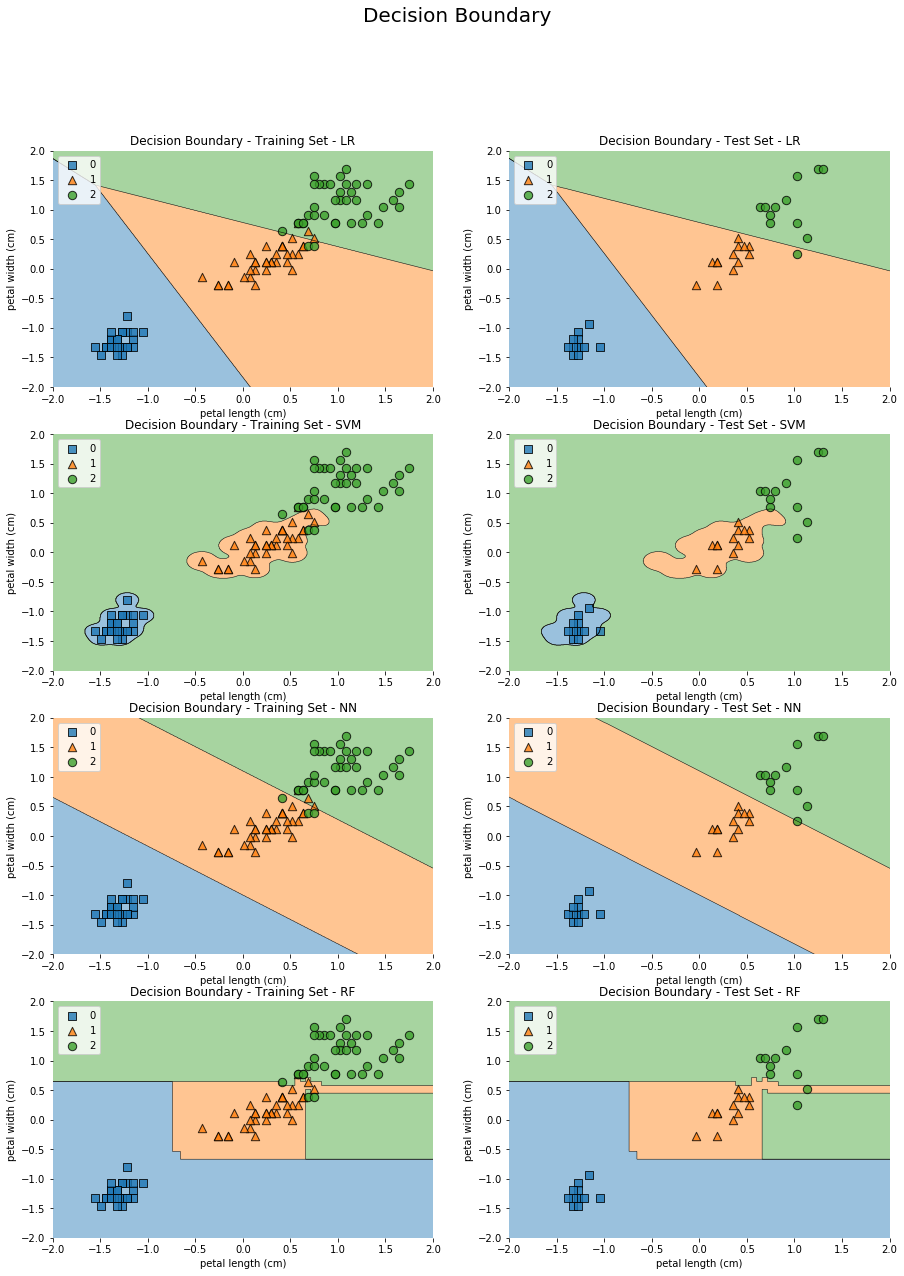

In [56]:
#Plot decision boundary, running untuk pembuatan plot agak cukup lama, sekitar 1 - 3 menit
plt.subplots(4,2,figsize = (15,20))
plt.suptitle('Decision Boundary', size = 20)
#Plot DB - Train - LR
plt.subplot(4,2,1)
plt.title('Decision Boundary - Training Set - LR', size = 12)
plot_decision_regions(X_train,y_train,logr,scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Test - LR
plt.subplot(4,2,2)
plt.title('Decision Boundary - Test Set - LR', size = 12)
plot_decision_regions(X_test,y_test,logr,scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Train - SVM
plt.subplot(4,2,3)
plt.title('Decision Boundary - Training Set - SVM', size = 12)
plot_decision_regions(X_train,y_train,svc,scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)

#plot DB - Test - SVM
plt.subplot(4,2,4)
plt.title('Decision Boundary - Test Set - SVM', size = 12)
plot_decision_regions(X_test,y_test,svc,scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Train - NN
plt.subplot(4,2,5)
plt.title('Decision Boundary - Training Set - NN', size = 12)
plot_decision_regions(X_train,y_train,nn,scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Test - NN
plt.subplot(4,2,6)
plt.title('Decision Boundary - Test Set - NN', size = 12)
plot_decision_regions(X_test,y_test,nn, scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Train - RF
plt.subplot(4,2,7)
plt.title('Decision Boundary - Training Set - RF', size = 12)
plot_decision_regions(X_train,y_train,rf,scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Test - RF
plt.subplot(4,2,8)
plt.title('Decision Boundary - Test Set - RF', size = 12)
plot_decision_regions(X_test,y_test,rf,scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


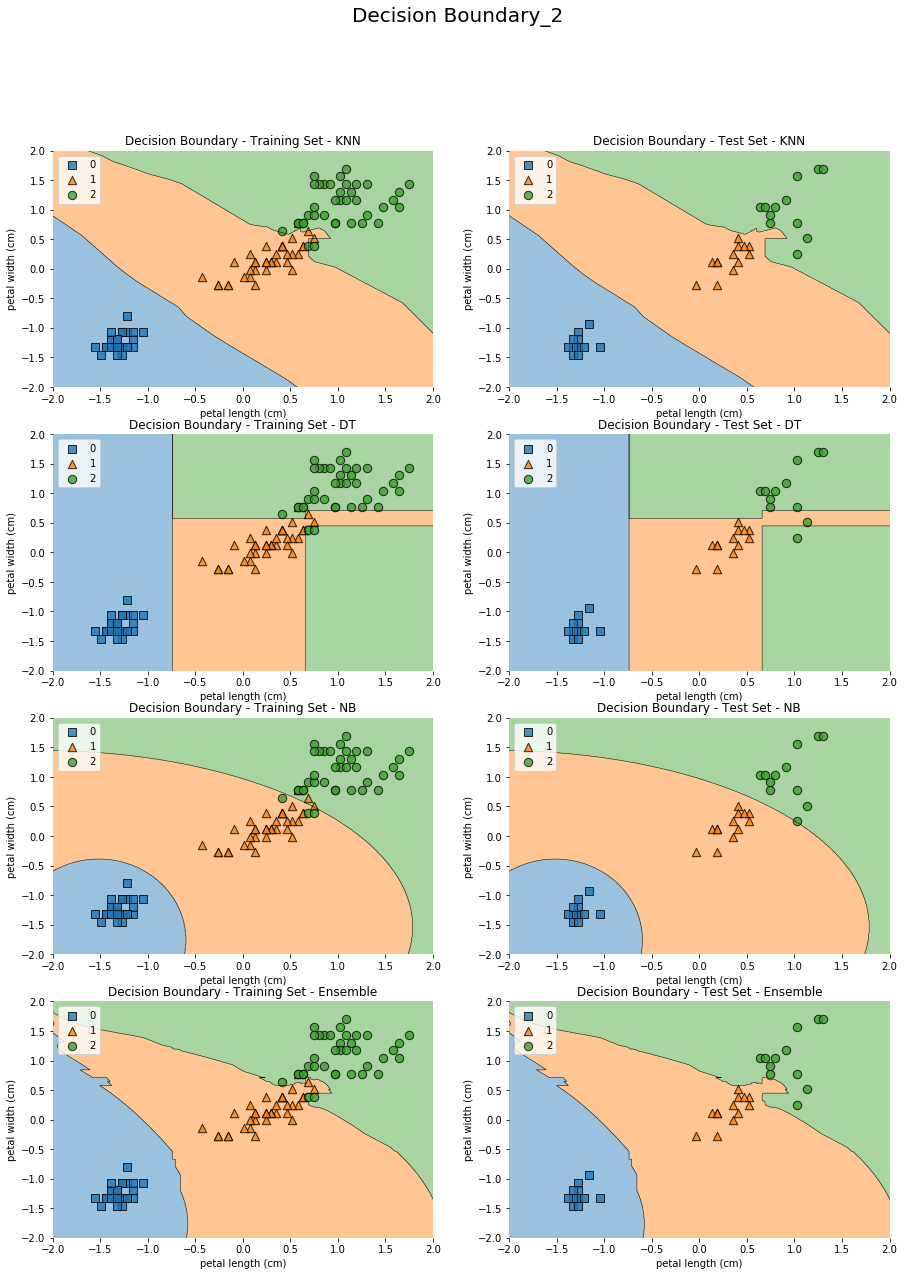

In [57]:
#Plot decision boundary_2
plt.subplots(4,2,figsize = (15,20))
plt.suptitle('Decision Boundary_2', size = 20)
#Plot DB - Train - KNN
plt.subplot(4,2,1)
plt.title('Decision Boundary - Training Set - KNN', size = 12)
plot_decision_regions(X_train,y_train,knn,scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Test - KNN
plt.subplot(4,2,2)
plt.title('Decision Boundary - Test Set - KNN', size = 12)
plot_decision_regions(X_test,y_test,knn,scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Train - DT
plt.subplot(4,2,3)
plt.title('Decision Boundary - Training Set - DT', size = 12)
plot_decision_regions(X_train,y_train,dt,scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)

#plot DB - Test - DT
plt.subplot(4,2,4)
plt.title('Decision Boundary - Test Set - DT', size = 12)
plot_decision_regions(X_test,y_test,dt,scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Train - NB
plt.subplot(4,2,5)
plt.title('Decision Boundary - Training Set - NB', size = 12)
plot_decision_regions(X_train,y_train,nb,scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Test - NB
plt.subplot(4,2,6)
plt.title('Decision Boundary - Test Set - NB', size = 12)
plot_decision_regions(X_test,y_test,nb, scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Train - Ensemble
plt.subplot(4,2,7)
plt.title('Decision Boundary - Training Set - Ensemble', size = 12)
plot_decision_regions(X_train,y_train,ens,scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Test - Ensemble
plt.subplot(4,2,8)
plt.title('Decision Boundary - Test Set - Ensemble', size = 12)
plot_decision_regions(X_test,y_test,ens,scatter_kwargs = {'s' : 70})
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel(df.columns[2],size = 10)
plt.ylabel(df.columns[3],size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


In [79]:
#Didapat secara score dan grafik, model yang paling baik adalah model Ensemble, yaitu menyatukan ke 7 model sebelumnya
#dengan menggunakan mekanisme voting

#Untuk itu akan dibandingkan performa Logistic Regression dengan Ensemble menggunakan Metrics F1 Score
print('Performa Logistic Regression pada Training Set\n')
print(classification_report(logr.predict(X_train), y_train))

print('Performa Logistic Regression pada Test Set \n')
print(classification_report(logr.predict(X_test), y_test))

print('Performa Model Ensemble pada Training Set\n')
print(classification_report(ens.predict(X_train), y_train))

print('Performa Model Ensemble pada Test Set \n')
print(classification_report(ens.predict(X_test), y_test))

Performa Logistic Regression pada Training Set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.92      0.94      0.93        36
           2       0.95      0.92      0.94        39

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112

Performa Logistic Regression pada Test Set 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Performa Model Ensemble pada Training Set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    

In [16]:
#Pengujian diatas dilakukan dengan mengambil 2 dari 4 fitur yang tersedia, namun pengambilan fitur ini akan menyebabkan
#sebagian informasi hilang. Untuk mengatasi masalah tersebut, maka dilakukan dimensionality reduction menggunakan PCA
#agar dimensinya berkurang menjadi 2 namun informasi dari data tersebut minim yang hilang.

In [35]:
#Transformasi data menggunakan PCA
X = np.array(df.drop(columns = 'species'))
y_label = np.array(df.species)
pca = PCA(n_components = 2)

X = pca.fit_transform(X)
y = le.fit_transform(y_label)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify = y)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Feature 2')

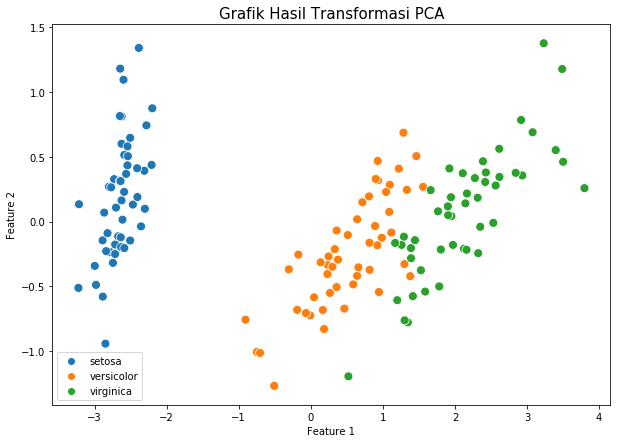

In [36]:
#Membuat plot data hasil transformasi PCA
plt.figure(figsize = (10,7))
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_label, s = 80)
plt.title("Grafik Hasil Transformasi PCA",size = 15)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


In [37]:
#Logistic Regression
logr= sklearn.linear_model.LogisticRegression(n_jobs = -1, 
                                               random_state = 12, penalty = 'l2', C = 5000)
#Support Vector Machine
svc = sklearn.svm.SVC(C = 1e4, kernel = 'rbf', gamma = 20,probability=True )

#Neural Network
nn = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20,20,20,20),alpha = 1, max_iter = 200, 
                                          random_state =200, batch_size = 15)
#Random Forest
rf = sklearn.ensemble.RandomForestClassifier(max_depth = 10, random_state = 3)

#K-Nearest Neighbors
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)

#Decision Trees
dt = sklearn.tree.DecisionTreeClassifier()

#Naive Bayes
nb = sklearn.naive_bayes.GaussianNB()

#Ensembling Classifier
ens = sklearn.ensemble.VotingClassifier(estimators=[('lr', logr), ('svm', svc), ('nn', nn), ('rf', rf), 
                                                    ('knn', knn), ('dt', dt), ('nb', nb)], voting = 'soft', n_jobs = -1)

clf_list = [logr,svc,nn,rf,knn,dt,nb,ens]
for clf in clf_list :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__)
    print(' Training Score : '.ljust(20), round(clf.score(X_train,y_train),3))
    print(' Test Score : '.ljust(20), round(clf.score(X_test, y_test),3), '\n')


LogisticRegression
 Training Score :    0.955
 Test Score :        1.0 

SVC
 Training Score :    1.0
 Test Score :        1.0 

MLPClassifier
 Training Score :    0.955
 Test Score :        1.0 

RandomForestClassifier
 Training Score :    1.0
 Test Score :        0.947 

KNeighborsClassifier
 Training Score :    0.973
 Test Score :        0.974 

DecisionTreeClassifier
 Training Score :    1.0
 Test Score :        0.974 

GaussianNB
 Training Score :    0.902
 Test Score :        0.816 

VotingClassifier
 Training Score :    1.0
 Test Score :        0.974 



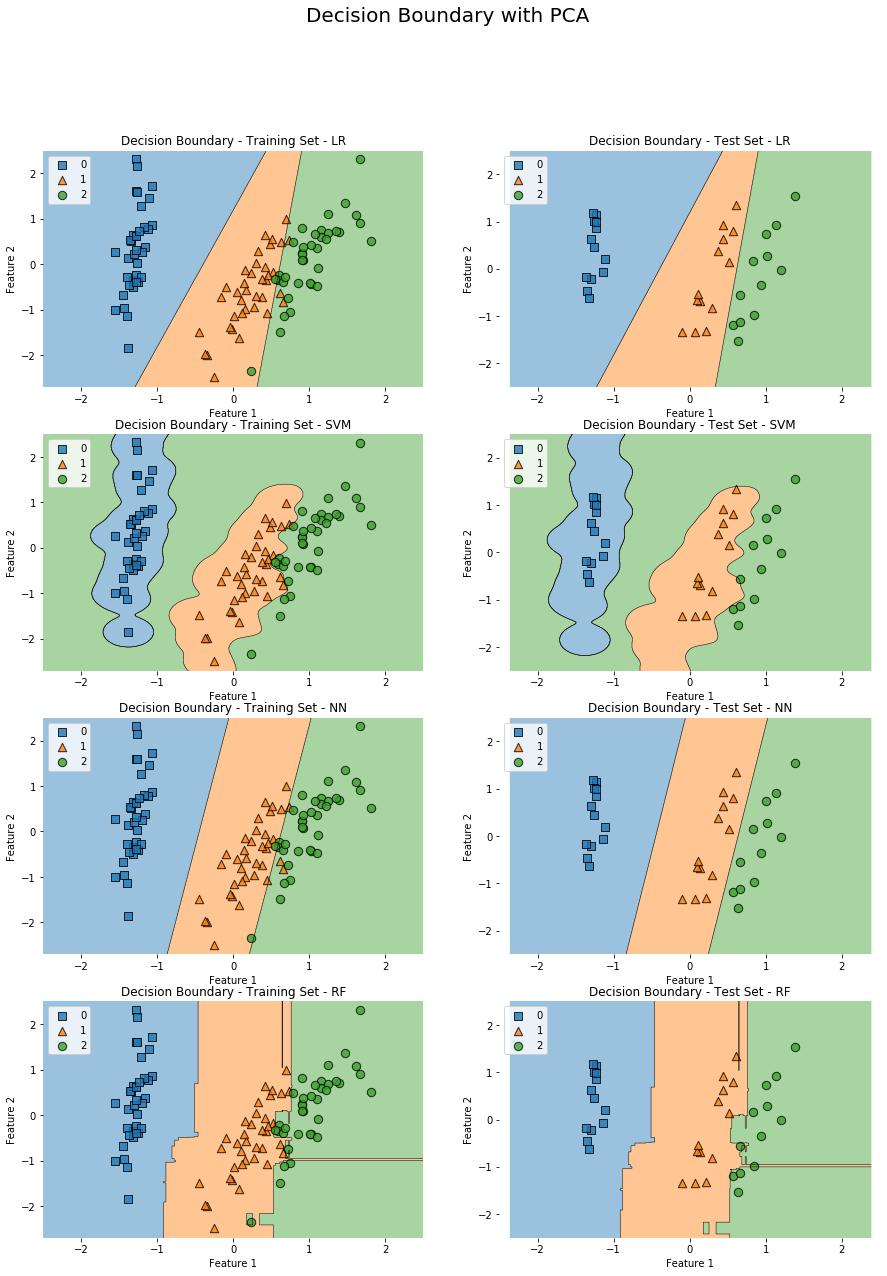

In [47]:
#Plot decision boundary
plt.subplots(4,2,figsize = (15,20))
plt.suptitle('Decision Boundary with PCA', size = 20)
#Plot DB - Train - LR
plt.subplot(4,2,1)
plt.title('Decision Boundary - Training Set - LR', size = 12)
plot_decision_regions(X_train,y_train,logr,scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.7,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Test - LR
plt.subplot(4,2,2)
plt.title('Decision Boundary - Test Set - LR', size = 12)
plot_decision_regions(X_test,y_test,logr,scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Train - SVM
plt.subplot(4,2,3)
plt.title('Decision Boundary - Training Set - SVM', size = 12)
plot_decision_regions(X_train,y_train,svc,scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.7,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)

#plot DB - Test - SVM
plt.subplot(4,2,4)
plt.title('Decision Boundary - Test Set - SVM', size = 12)
plot_decision_regions(X_test,y_test,svc,scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Train - NN
plt.subplot(4,2,5)
plt.title('Decision Boundary - Training Set - NN', size = 12)
plot_decision_regions(X_train,y_train,nn,scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.7,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Test - NN
plt.subplot(4,2,6)
plt.title('Decision Boundary - Test Set - NN', size = 12)
plot_decision_regions(X_test,y_test,nn, scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Train - RF
plt.subplot(4,2,7)
plt.title('Decision Boundary - Training Set - RF', size = 12)
plot_decision_regions(X_train,y_train,rf,scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.7,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Test - RF
plt.subplot(4,2,8)
plt.title('Decision Boundary - Test Set - RF', size = 12)
plot_decision_regions(X_test,y_test,rf,scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


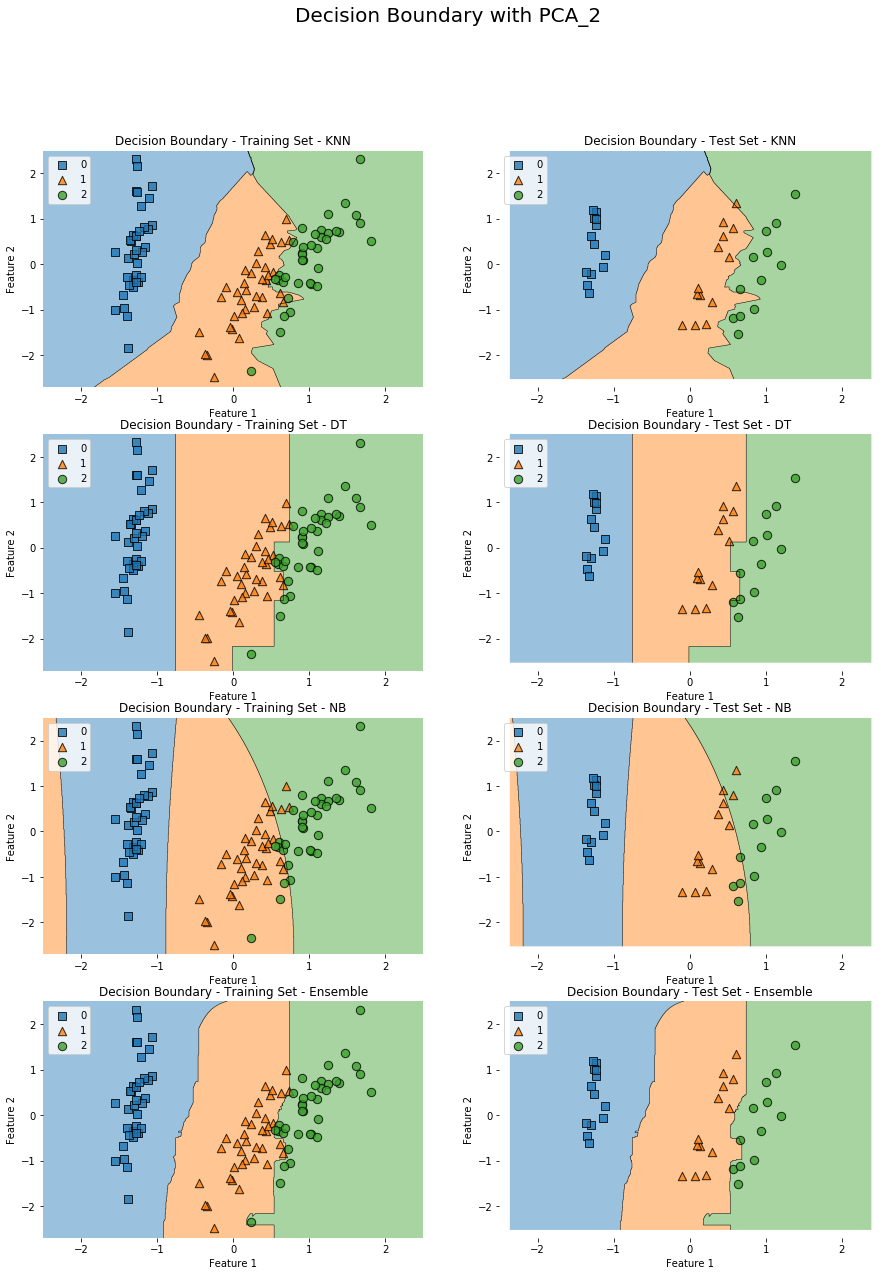

In [49]:
#Plot decision boundary
plt.subplots(4,2,figsize = (15,20))
plt.suptitle('Decision Boundary with PCA_2', size = 20)
#Plot DB - Train - KNN
plt.subplot(4,2,1)
plt.title('Decision Boundary - Training Set - KNN', size = 12)
plot_decision_regions(X_train,y_train,knn,scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.7,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Test - KNN
plt.subplot(4,2,2)
plt.title('Decision Boundary - Test Set - KNN', size = 12)
plot_decision_regions(X_test,y_test,knn,scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.7,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Train - DT
plt.subplot(4,2,3)
plt.title('Decision Boundary - Training Set - DT', size = 12)
plot_decision_regions(X_train,y_train,dt,scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.7,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)

#plot DB - Test - DT
plt.subplot(4,2,4)
plt.title('Decision Boundary - Test Set - DT', size = 12)
plot_decision_regions(X_test,y_test,dt,scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.7,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Train - NB
plt.subplot(4,2,5)
plt.title('Decision Boundary - Training Set - NB', size = 12)
plot_decision_regions(X_train,y_train,nb,scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.7,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Test - NB
plt.subplot(4,2,6)
plt.title('Decision Boundary - Test Set - NB', size = 12)
plot_decision_regions(X_test,y_test,nb, scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.7,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Train - Ensemble
plt.subplot(4,2,7)
plt.title('Decision Boundary - Training Set - Ensemble', size = 12)
plot_decision_regions(X_train,y_train,ens,scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.7,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)


#plot DB - Test - Ensemble
plt.subplot(4,2,8)
plt.title('Decision Boundary - Test Set - Ensemble', size = 12)
plot_decision_regions(X_test,y_test,ens,scatter_kwargs = {'s' : 70})
plt.xlim(-2.5,2.5)
plt.ylim(-2.7,2.5)
plt.xlabel('Feature 1',size = 10)
plt.ylabel('Feature 2',size = 10)
plt.legend(loc = 'upper left', fontsize = 10)
